In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)                 # reproducible

X = 2 * np.random.rand(100, 1)     # 100 rows, 1 feature
y = 4 + 3 * X + np.random.randn(100, 1)  # true line + noise
print("Shapes:", X.shape, y.shape)


Shapes: (100, 1) (100, 1)


In [2]:
X_b = np.c_[np.ones((100, 1)), X]   # prepend a column of 1s
print(X_b[:3])                      # show the first 3 rows


[[1.         0.74908024]
 [1.         1.90142861]
 [1.         1.46398788]]


In [3]:
lr = 0.1            # learning rate η
n_epochs = 1000
m = X_b.shape[0]    # sample count (100)

theta = np.random.randn(2, 1)  # random initial parameters (bias, weight)
history = []        # store loss for plotting

for epoch in range(n_epochs):
    gradients = (2/m) * X_b.T @ (X_b @ theta - y)  # d(MSE)/dθ
    theta -= lr * gradients                        # parameter update
    if epoch % 10 == 0:                            # log every 10 steps
        mse = np.mean((X_b @ theta - y) ** 2)
        history.append(mse)

print("Final theta:", theta.ravel())


Final theta: [4.21509616 2.77011339]


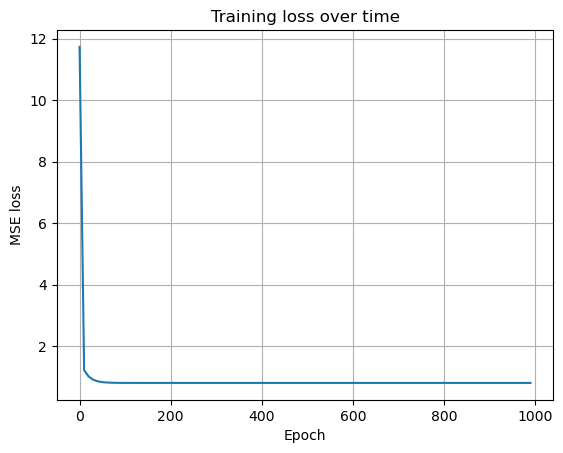

In [4]:
plt.plot(np.arange(0, n_epochs, 10), history)
plt.xlabel("Epoch")
plt.ylabel("MSE loss")
plt.title("Training loss over time")
plt.grid(True)
plt.show()


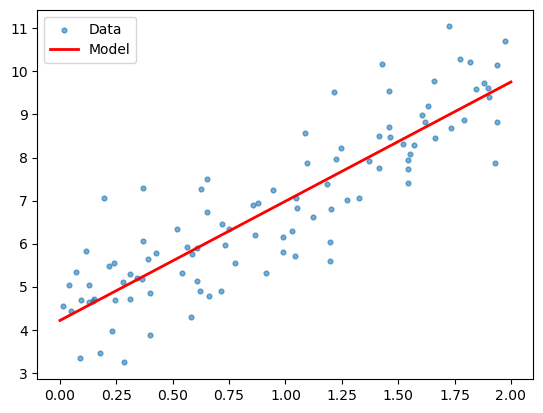

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_pred = X_new_b @ theta

plt.scatter(X, y, s=12, alpha=0.6, label="Data")
plt.plot(X_new, y_pred, "r-", linewidth=2, label="Model")
plt.legend()
plt.show()


### Reflection

* **Feature scaling** – Our single feature already lies in `[0, 2]`, so gradients converge quickly.  
  With higher-dimensional or disparate-scale data, normalising each feature (zero-mean, unit-var)
  speeds convergence and prevents exploding/vanishing gradients.

* **Learning rate (η = 0.1)** – Try η = 1 → diverges; η = 0.01 → converges but needs ~10× epochs.

* **Why gradient descent at all?**  
  For ≤ 10 k rows & few features, a closed-form solution  

  \[
  \theta_\* \;=\; (X^{\mathsf T}X)^{-1} X^{\mathsf T}y
  \]

  is one line in NumPy, but it’s \(O(n^3)\) in feature-count.  
  GD scales to millions of features and supports streaming minibatches.


In [6]:
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
print("Closed-form θ:", theta_best.ravel())


Closed-form θ: [4.21509616 2.77011339]
